In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [199]:
df = pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")
df2=pd.read_csv("test.csv")

In [200]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0
2,2,30000,2,2,2,23,3,3,3,3,...,29176,29958,30520,1200,1200,0,1400,1200,0,1
3,3,280000,2,1,2,31,2,-1,-1,-2,...,0,0,0,168,0,0,0,0,0,0
4,4,210000,1,2,1,54,2,-1,-1,-1,...,485,210,3483,176,195,485,0,4466,417,0


In [201]:
df["default payment next month"].value_counts()

0    21023
1     5977
Name: default payment next month, dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27000 non-null  int64
 1   LIMIT_BAL                   27000 non-null  int64
 2   SEX                         27000 non-null  int64
 3   EDUCATION                   27000 non-null  int64
 4   MARRIAGE                    27000 non-null  int64
 5   AGE                         27000 non-null  int64
 6   PAY_0                       27000 non-null  int64
 7   PAY_2                       27000 non-null  int64
 8   PAY_3                       27000 non-null  int64
 9   PAY_4                       27000 non-null  int64
 10  PAY_5                       27000 non-null  int64
 11  PAY_6                       27000 non-null  int64
 12  BILL_AMT1                   27000 non-null  int64
 13  BILL_AMT2                   27000 non-null  int64
 14  BILL_A

CHECKING FOR NULL VALUES

In [203]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

CHECKING NO OF DEFAULTERS IN DATA

In [204]:
df["default payment next month"].value_counts()

0    21023
1     5977
Name: default payment next month, dtype: int64

RELATION BETWEEN NO OF DEFAULTERS AND SEX

<AxesSubplot:xlabel='SEX', ylabel='count'>

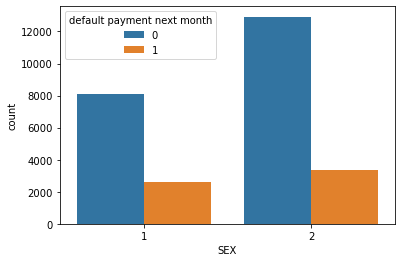

In [205]:
sns.countplot(data=df,x=df["SEX"],hue="default payment next month")

PLOTTING AGES OF PEOPLE

<AxesSubplot:xlabel='ID', ylabel='AGE'>

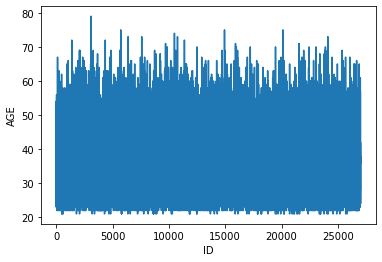

In [206]:
sns.lineplot(x=df["ID"],y=df["AGE"],data=df)

FINDING UNIQUE VALUES IN EDUCATION
NOTE: HERE WE FIND THAT 5 AND 6 ARE UNKNOWN SO WE MERGE THEM INTO 4 WHICH IS OTHER

In [207]:
df.EDUCATION.unique()


array([2, 1, 3, 5, 4, 0, 6], dtype=int64)

CREATING NEW COLUMN BY ADD PAY_I'S TO CHECK THE PAYMENT STATUS OF CANDIDATES

CREATING A NEW COLUMN NAMED DUES TO FIND THE TOTAL DUE BY THE CANDIDATES

In [208]:
change = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
change1 = (df1.EDUCATION == 5) | (df1.EDUCATION == 6) | (df1.EDUCATION == 0)
df.loc[change, 'EDUCATION'] = 4
df1.loc[change1,'EDUCATION'] = 4

df['Payement_Value'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']
df1['Payement_Value'] = df1['PAY_0'] + df1['PAY_2'] + df1['PAY_3'] + df1['PAY_4'] + df1['PAY_5'] + df1['PAY_6']



df['Dues'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])-(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'])
df1['Dues'] = (df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6'])-(df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6'])

CHECKING THE UNIQUE VALUES IN MARRIAGE

In [209]:
df.MARRIAGE.unique()

array([2, 1, 0, 3], dtype=int64)

IN DATA IT IS GIVEN MARRIAGE VALUE BETWEEN 1 2 3 BUT DATA IN CSV CONTAINS 0 SO WE CONVERT 0 INTO 3(OTHERS)

In [210]:

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df1.loc[df1.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()


2    14381
1    12271
3      348
Name: MARRIAGE, dtype: int64

HERE WE CAN SEE IN pay_i's THERE ARE -2 VALUES BUT AS PER DATA DESCRIPTION IN KAGGLE IT SHOULD NOT BE -2 AND ALSO WE CAN CLUB -VE VALUES INTO 0 CATEGORY AS THEY ARE SIMILAR
SO WE CHANGE -2 -1 INTO 0

In [211]:
for i in [df.PAY_0,df.PAY_2,df.PAY_3,df.PAY_4,df.PAY_5,df.PAY_6]:
    print("unique no in pay_i's:",i.unique())

unique no in pay_i's: [-1  0  3  2  1 -2  4  7  5  8  6]
unique no in pay_i's: [-1  0  3  2 -2  1  7  6  4  5  8]
unique no in pay_i's: [-1  2  3  0 -2  6  1  5  4  7  8]
unique no in pay_i's: [ 0  3 -2 -1  5  2  1  4  7  6  8]
unique no in pay_i's: [ 0  2 -2 -1  4  3  7  5  6  8]
unique no in pay_i's: [ 0  2 -2 -1  3  4  7  5  6  8]


In [212]:
for i in [['PAY_0',df.PAY_0,df1.PAY_0],['PAY_2',df.PAY_2,df1.PAY_2],['PAY_3',df.PAY_3,df1.PAY_3],['PAY_4',df.PAY_4,df1.PAY_4],['PAY_5',df.PAY_5,df1.PAY_5],['PAY_6',df.PAY_6,df1.PAY_6]]:
  change = (i[1] == -2) | (i[1] == -1) | (i[1] == 0)
  change1 = (i[2] == -2) | (i[2] == -1) | (i[2] == 0)
  df.loc[change, i[0]] = 0
  df1.loc[change1, i[0]] = 0
  

PLOTTING GRAPHS

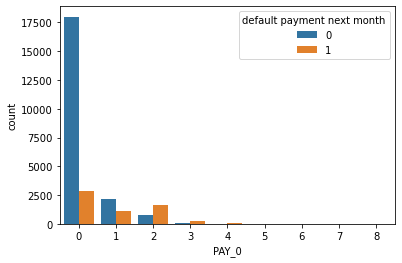

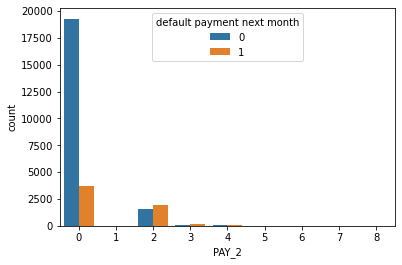

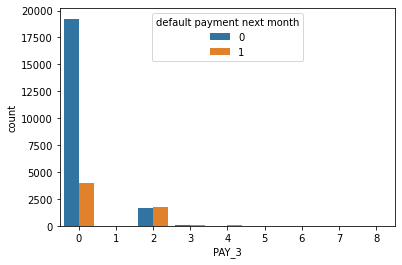

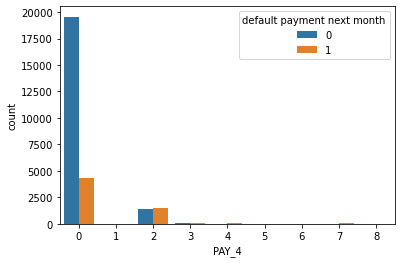

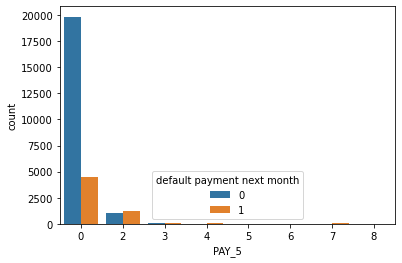

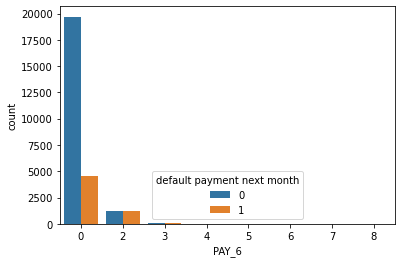

In [213]:
for i in ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]:
    plt.figure()
    sns.countplot(x=df[i],hue=df["default payment next month"])

WE WILL ADD NEW COLUMNS SO WE CAN CHECK THE CLOSENESS OF DUES TO LIMIT FOR EACH MONTH

In [214]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL




df1['Closeness_6'] = (df1.LIMIT_BAL - df1.BILL_AMT6) / df1.LIMIT_BAL
df1['Closeness_5'] = (df1.LIMIT_BAL - df1.BILL_AMT5) / df1.LIMIT_BAL
df1['Closeness_4'] = (df1.LIMIT_BAL - df1.BILL_AMT4) / df1.LIMIT_BAL
df1['Closeness_3'] = (df1.LIMIT_BAL - df1.BILL_AMT3) / df1.LIMIT_BAL
df1['Closeness_2'] = (df1.LIMIT_BAL - df1.BILL_AMT2) / df1.LIMIT_BAL
df1['Closeness_1'] = (df1.LIMIT_BAL - df1.BILL_AMT1) / df1.LIMIT_BAL

SPLITTING INDEPENDENT AND DEPENDENT VARIABLES

In [215]:
X_train = df.drop("default payment next month",axis=1)
Y_train = df["default payment next month"]

X_test = df1
# Y_test = df1["default payment next month"]

MODEL TRAINING

In [216]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.02,random_state=44)

In [217]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,f1_score,recall_score

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2, random_state=None,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, verbose=0,
            warm_start=False)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
# Accu = accuracy_score(Y_test,predictions)
predictions2 = clf.predict(X_train)
Accu2 = accuracy_score(Y_train,predictions2)
# print("test accuracy is:",Accu)
print("train accuracy is:",Accu2)
# print("precision score is:",precision_score(Y_test, predictions, average='weighted'))
# print(recall_score(predictions,Y_test))
# print(f1_score(predictions,Y_test))

train accuracy is: 1.0


In [219]:
df2["default payment next month"]=predictions

In [220]:
df2["default payment next month"].value_counts()

0    2621
1     379
Name: default payment next month, dtype: int64

In [221]:
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,27000,30000,1,2,2,25,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
1,27001,150000,2,1,2,26,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
2,27002,70000,2,3,1,32,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
3,27003,130000,1,3,2,49,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
4,27004,50000,2,2,2,36,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,29995,400000,2,1,2,29,-1,-1,-1,-1,...,20031,916,30979,3168,372,20231,916,30979,1984,0
2996,29996,150000,2,1,2,28,0,0,0,0,...,12115,12613,15225,1600,1500,1600,1000,3000,2200,0
2997,29997,80000,1,1,2,33,0,0,0,0,...,69708,49743,48969,3492,3593,3006,1729,2000,1900,0
2998,29998,160000,2,1,2,27,0,0,-2,-1,...,15866,4168,2067,0,6000,15866,4168,2067,11826,0


In [222]:
df2 = df2[["ID","default payment next month"]]

In [223]:
df2

,ID,default payment next month
0,27000,0
1,27001,0
2,27002,0
3,27003,0
4,27004,0
...,...,...
2995,29995,0
2996,29996,0
2997,29997,0
2998,29998,0


In [224]:
df2["default payment next month"].value_counts()

0    2621
1     379
Name: default payment next month, dtype: int64

In [225]:
df2.to_csv("final_output1.csv",index=False)

In [226]:
pd.read_csv("final_output1.csv").head(2)

,ID,default payment next month
0,27000,0
1,27001,0
